In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



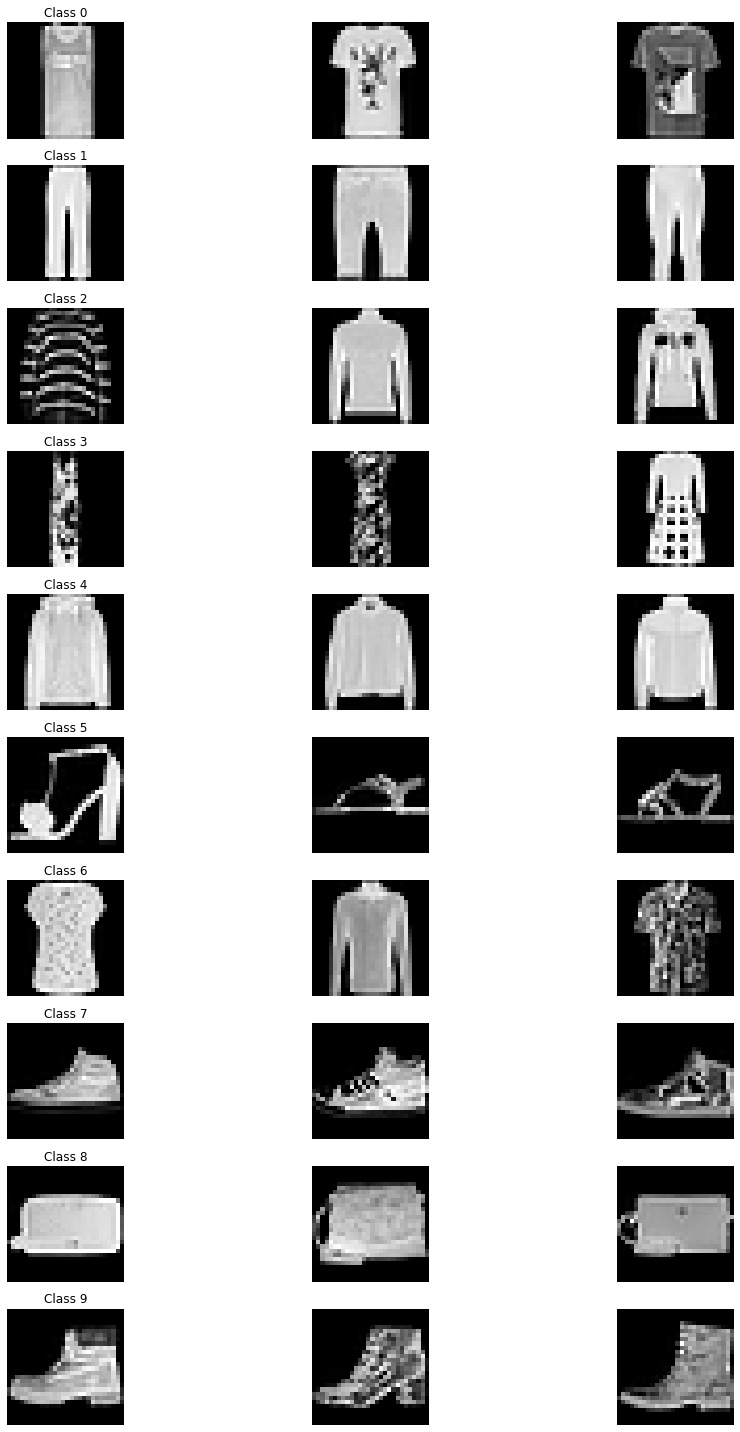

In [49]:
import matplotlib.pyplot as plt
import numpy as np


# total number of class
num_classes = len(np.unique(train_labels))
# Number of images per class
images_per_class= 3

# dimensions of images to be displayed
fig, axs = plt.subplots(num_classes,images_per_class, figsize=(15, num_classes * 2))
#Visualisation of images from each class in the Fashion MNIST 
for class_idx in range(num_classes):
    # store all the image indices of current class in indices
    indices = np.where(train_labels == class_idx)[0]


    #pick selected number of images 
    selected_indices = np.random.choice(indices, images_per_class, replace=False)


    for plot_idx, image_idx in enumerate(selected_indices):
        image = train_images[image_idx]
        ax = axs[class_idx, plot_idx]
        ax.imshow(image, cmap='gray' if image.ndim == 2 else None)
        ax.axis('off')
        if plot_idx == 0:
            ax.set_title(f'Class {class_idx}')

plt.tight_layout()
plt.show()


In [50]:
# Normalize the images to [0, 1] range
train_images, test_images = train_images / 255.0, test_images / 255.0

#Data formatting converting labels to one hot code vectors
num_of_labels=len(np.unique(train_labels))
print(train_labels)

one_hot = np.zeros((len(train_labels), num_of_labels))

# Set the appropriate element to one
""""example:  a=[0,1,1]: 0 [1 0], 1 [0 1] """
one_hot[np.arange(len(train_labels)), train_labels] = 1

for i in range(5):
    print(one_hot[i],train_labels[i])
    
#shallow neural network
train_images=train_images.astype(np.float32)


[9 0 0 ... 3 0 5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0


In [51]:
# BASIC NN WITH ONE LAYER
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

# Build the neural network model
model1 = models.Sequential([
    # Flatten the input images to 1D array
    layers.Flatten(input_shape=(28, 28)),
    # Add a densely-connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    
    layers.Dropout(0.2),
    # Add the output layer with 10 neurons for each class, using softmax activation
    layers.Dense(10, activation='softmax')
])
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:

# Build the neural network model
model2 = Sequential()
    # Flatten the input images to 1D array
model2.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), 
padding='same', input_shape=(28, 28,1)))

model2.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
padding='same'))
model2.add(Flatten())
# Add a densely-connected layer with 128 neurons
model2.add(Dense(128, activation='relu'))
    
    
# Add the output layer with 10 neurons for each class, using softmax activation
model2.add(Dense(10, activation='softmax'))


# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               1605760   
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,608,298
Trainable params: 1,608,298
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 3rd neural network model
model3 = Sequential()
   
model3.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), 
padding='same', input_shape=(28, 28,1)))
model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
padding='same'))
model3.add(Dropout(0.5))

model3.add(MaxPool2D(pool_size=2))
model3.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
padding='same'))
 # Flatten the input images to 1D array
model3.add(Flatten())
# Add a densely-connected layer with 64,128 neurons
model3.add(Dense(64, activation='relu'))
model3.add(Dense(128, activation='relu'))
    
# Add the output layer with 10 neurons for each class, using softmax activation
model3.add(Dense(10, activation='softmax'))


# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#categorical_crossentropy used for one hot code
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 32)         

In [54]:
#recording loss and accuracy metrics over epochs
import matplotlib.pyplot as plt

def plot_model_history(history, title):
    plt.figure(figsize=(12, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')  # Or 'acc'
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Or 'val_acc'
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5535 - accuracy: 0.8059 - val_loss: 0.4168 - val_accuracy: 0.8503
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4146 - accuracy: 0.8496 - val_loss: 0.3760 - val_accuracy: 0.8660
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3757 - accuracy: 0.8620 - val_loss: 0.3562 - val_accuracy: 0.8725
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3557 - accuracy: 0.8688 - val_loss: 0.3501 - val_accuracy: 0.8710
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3373 - accuracy: 0.8754 - val_loss: 0.3372 - val_accuracy: 0.8773
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3263 - accuracy: 0.8791 - val_loss: 0.3506 - val_accuracy: 0.8702
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3089 - accuracy: 0.8872 - val_loss: 0.3378 - val_accuracy

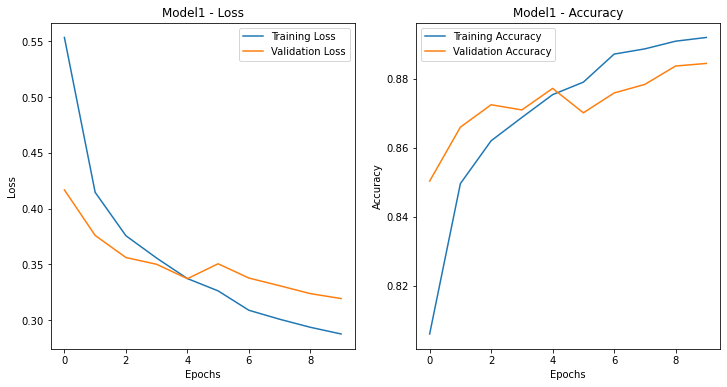

In [55]:

# Train the model with the training data
history1=model1.fit(train_images, one_hot, epochs=10, validation_split=0.2)

plot_model_history(history1,"Model1")

Epoch 1/5
1500/1500 [==============================] - 58s 38ms/step - loss: 0.4106 - accuracy: 0.8545 - val_loss: 0.3082 - val_accuracy: 0.8884
Epoch 2/5
1500/1500 [==============================] - 59s 40ms/step - loss: 0.2537 - accuracy: 0.9061 - val_loss: 0.2657 - val_accuracy: 0.9033
Epoch 3/5
1500/1500 [==============================] - 58s 38ms/step - loss: 0.1864 - accuracy: 0.9321 - val_loss: 0.2539 - val_accuracy: 0.9077
Epoch 4/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.1357 - accuracy: 0.9497 - val_loss: 0.2729 - val_accuracy: 0.9085
Epoch 5/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0962 - accuracy: 0.9648 - val_loss: 0.3223 - val_accuracy: 0.9067


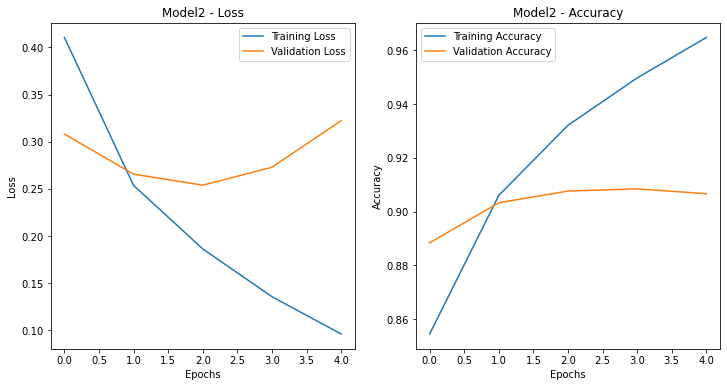

In [56]:
# Train the model with the training data
history2=model2.fit(train_images, one_hot, epochs=5, validation_split=0.2)
plot_model_history(history2,"Model2")

Epoch 1/8
1500/1500 [==============================] - 37s 22ms/step - loss: 0.5414 - accuracy: 0.7996 - val_loss: 0.4340 - val_accuracy: 0.8505
Epoch 2/8
1500/1500 [==============================] - 33s 22ms/step - loss: 0.3635 - accuracy: 0.8666 - val_loss: 0.3534 - val_accuracy: 0.8793
Epoch 3/8
1500/1500 [==============================] - 28s 19ms/step - loss: 0.3160 - accuracy: 0.8823 - val_loss: 0.3323 - val_accuracy: 0.8860
Epoch 4/8
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2887 - accuracy: 0.8927 - val_loss: 0.3017 - val_accuracy: 0.8967
Epoch 5/8
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2715 - accuracy: 0.8991 - val_loss: 0.2888 - val_accuracy: 0.9002
Epoch 6/8
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2587 - accuracy: 0.9032 - val_loss: 0.2931 - val_accuracy: 0.8967
Epoch 7/8
1500/1500 [==============================] - 34s 23ms/step - loss: 0.2483 - accuracy: 0.9066 - val_loss: 0.2958 - val_ac

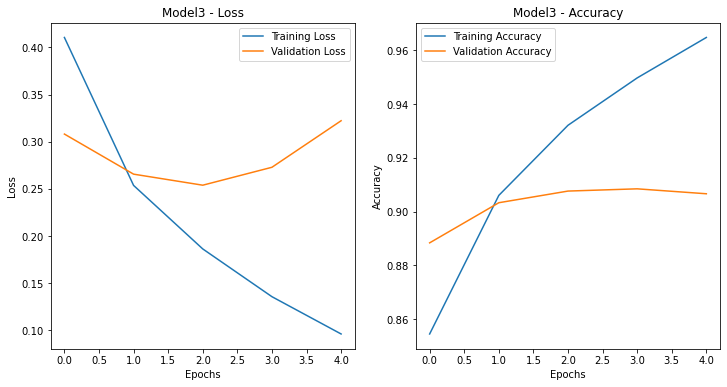

In [57]:
history3=model3.fit(train_images, one_hot, epochs=8, validation_split=0.2)
plot_model_history(history2,"Model3")

In [58]:
num_of_labels=len(np.unique(test_labels))
print(num_of_labels)
print(test_labels[1])
one_hot_t = np.zeros((len(test_labels), num_of_labels))

# Set the appropriate element to one
""""example:  a=[0,1,1]: 0 [1 0], 1 [0 1] """
one_hot_t[np.arange(len(test_labels)), test_labels] = 1

10
2


In [59]:
print("Model1")
loss1, accuracy1 = model1.evaluate(test_images, one_hot_t)

print(f"Test accuracy: {accuracy1}")
print(f"loss: {loss1}")

print("Model2")
loss2, accuracy2 = model2.evaluate(test_images, one_hot_t)

print(f"Test accuracy: {accuracy2}")
print(f"loss: {loss2}")

print("MODEL2")
loss3, accuracy3 = model3.evaluate(test_images, one_hot_t)
print(f"Test accuracy: {accuracy3}")
print(f"loss: {loss3}")


Model1
313/313 [==============================] - 2s 4ms/step - loss: 0.3479 - accuracy: 0.8778
Test accuracy: 0.8777999877929688
loss: 0.3478619158267975
Model2
313/313 [==============================] - 3s 9ms/step - loss: 0.3389 - accuracy: 0.8997
Test accuracy: 0.8996999859809875
loss: 0.3388550579547882
MODEL2
313/313 [==============================] - 4s 12ms/step - loss: 0.2677 - accuracy: 0.9045
Test accuracy: 0.9045000076293945
loss: 0.26767268776893616


In [60]:
#report on commbined accuracy of the committe
def plot_combined_model_history(histories, titles, final_loss_acc):
    plt.figure(figsize=(18, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{titles[i]} Training Loss')
        plt.scatter(len(history.history['loss']) - 1, final_loss_acc[i][0], label=f'{titles[i]} Final Loss', marker='x')
    plt.title('Models - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{titles[i]} Training Accuracy')  # Or 'acc'
        plt.scatter(len(history.history['accuracy']) - 1, final_loss_acc[i][1], label=f'{titles[i]} Final Accuracy', marker='x')
    plt.title('Models - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

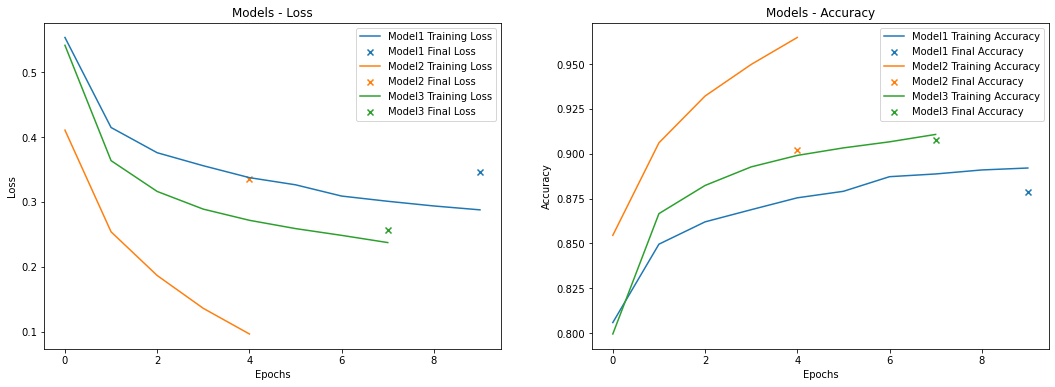

In [61]:
histories = [history1, history2, history3]  # Replace with your actual history objects
titles = ["Model1", "Model2", "Model3"]
final_loss_acc = [(0.3453, 0.8785), (0.3347, 0.9018), (0.2572, 0.9074)]

plot_combined_model_history(histories, titles, final_loss_acc)

In [62]:
model_pred1=model1.predict(test_images)

print(model_pred1[2])

model_pred2=model2.predict(test_images)

print(model_pred2[2])

model_pred3=model3.predict(test_images)

print(model_pred3[2])

313/313 [==============================] - 1s 3ms/step
[7.8003703e-10 1.0000000e+00 9.2688905e-11 3.8139727e-10 1.5470163e-09
 4.1297964e-15 1.6367243e-11 3.0812008e-17 1.9565212e-10 1.8689650e-16]
313/313 [==============================] - 3s 9ms/step
[1.3710497e-11 1.0000000e+00 1.4434898e-11 2.9453187e-12 3.1522129e-13
 2.3078219e-14 3.8493944e-11 1.5972336e-15 5.2760717e-14 1.0714482e-16]
313/313 [==============================] - 4s 11ms/step
[1.0692743e-06 9.9991310e-01 1.6739649e-07 1.8408919e-06 4.0615276e-05
 2.8031885e-10 4.3138931e-05 3.5244793e-10 7.5730064e-08 1.8561910e-09]


In [63]:
average_predictions = (model_pred1 + model_pred2 + model_pred3) / 3

final_predictions = np.argmax(average_predictions, axis=1)
print(len(final_predictions))
 

correct_predictions=0

correct_predictions = final_predictions == test_labels
print(correct_predictions)
combined_accuracy = np.mean(correct_predictions)
print(f"Combined Accuracy of the Committee: {combined_accuracy*100}")

10000
[ True  True  True ...  True  True  True]
Combined Accuracy of the Committee: 91.14999999999999


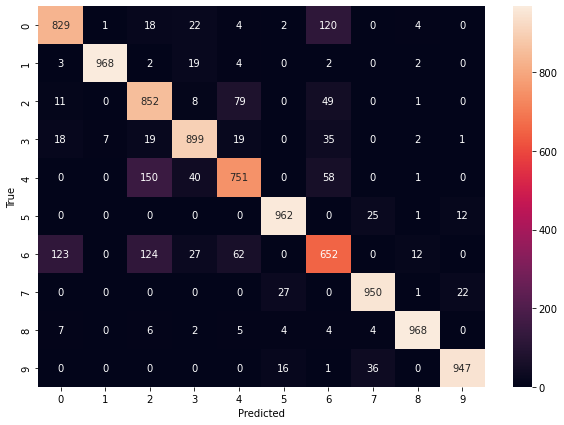

In [64]:
#confusion matrices for each model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_mat(mat):
    plt.figure(figsize=(10, 7))
    sns.heatmap(mat, annot=True, fmt='g')  # 'g' format helps avoid scientific notation
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

final_predictions1 = np.argmax(model_pred1, axis=1)

cm1 = confusion_matrix(test_labels, final_predictions1)
confusion_mat(cm1)


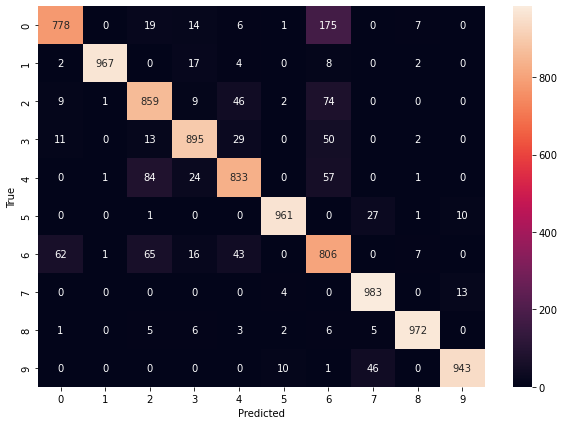

In [65]:
final_predictions2 = np.argmax(model_pred2, axis=1)

cm2 = confusion_matrix(test_labels, final_predictions2)

confusion_mat(cm2)

MODEL3


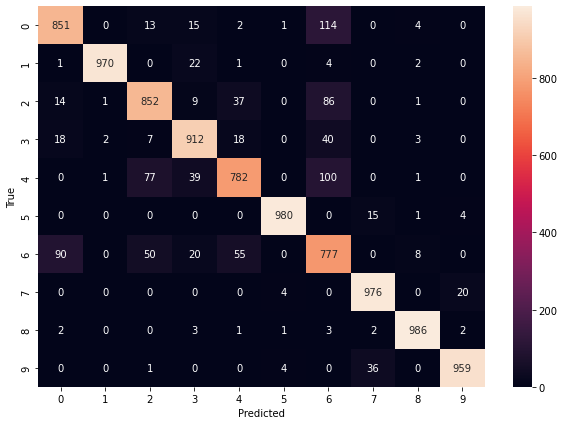

In [66]:
print("MODEL3")

final_predictions3 = np.argmax(model_pred3, axis=1)

cm3 = confusion_matrix(test_labels, final_predictions3)

confusion_mat(cm3)

committee


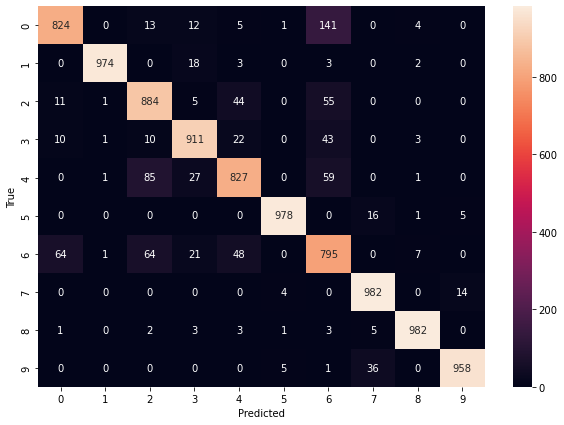

In [67]:
print("committee")

final_predictions_c = np.argmax(model_pred3, axis=1)

cm = confusion_matrix(test_labels, final_predictions)

confusion_mat(cm)

In [68]:

#Generate classification reports, comparing precision, recall, and F1-scores.
from sklearn.metrics import classification_report

#reports of model1
report_model1 = classification_report(test_labels, final_predictions1)
##reports of model2
report_model2 = classification_report(test_labels, final_predictions2)
##reports of model3
report_model3 = classification_report(test_labels, final_predictions3)
#reports of commettiee model
report_model_c = classification_report(test_labels, final_predictions)

print("Classification Report for Model 1:\n", report_model1)
print("Classification Report for Model 2:\n", report_model2)
print("Classification Report for Model 3:\n", report_model3)
print("Classification Report for Model 4:\n", report_model_c)


Classification Report for Model 1:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.85      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.81      0.75      0.78      1000
           5       0.95      0.96      0.96      1000
           6       0.71      0.65      0.68      1000
           7       0.94      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Classification Report for Model 2:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1000
           1       1.00      0.97      0.98      1000
      

In [69]:
def extract_metrics(report):
    # Extracting precision, recall, and f1-score for each class and the macro average
    metrics = {label: {metric: report[label][metric] for metric in ['precision', 'recall', 'f1-score']} 
               for label in report if label not in ['accuracy', 'macro avg', 'weighted avg']}
    metrics['macro avg'] = {metric: report['macro avg'][metric] for metric in ['precision', 'recall', 'f1-score']}
    return metrics
report_model1 = classification_report(test_labels, final_predictions1, output_dict=True)
##reports of model2
report_model2 = classification_report(test_labels, final_predictions2, output_dict=True)
##reports of model3
report_model3 = classification_report(test_labels, final_predictions3, output_dict=True)
#reports of commettiee model
report_model_c = classification_report(test_labels, final_predictions, output_dict=True)

metrics_model1 = extract_metrics(report_model1)
metrics_model2 = extract_metrics(report_model2)
metrics_model3 = extract_metrics(report_model3)
metrics_model4 = extract_metrics(report_model_c)

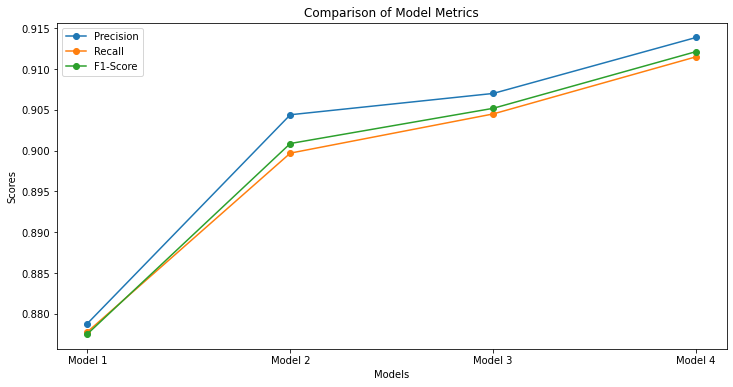

In [70]:
import matplotlib.pyplot as plt

models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
precisions = [metrics_model1['macro avg']['precision'], metrics_model2['macro avg']['precision'], 
              metrics_model3['macro avg']['precision'], metrics_model4['macro avg']['precision']]
recalls = [metrics_model1['macro avg']['recall'], metrics_model2['macro avg']['recall'], 
           metrics_model3['macro avg']['recall'], metrics_model4['macro avg']['recall']]
f1_scores = [metrics_model1['macro avg']['f1-score'], metrics_model2['macro avg']['f1-score'], 
             metrics_model3['macro avg']['f1-score'], metrics_model4['macro avg']['f1-score']]

x = range(len(models))

plt.figure(figsize=(12, 6))
plt.plot(x, precisions, label='Precision', marker='o')
plt.plot(x, recalls, label='Recall', marker='o')
plt.plot(x, f1_scores, label='F1-Score', marker='o')
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Metrics')
plt.legend()
plt.show()

1/1 [==============================] - 0s 63ms/step


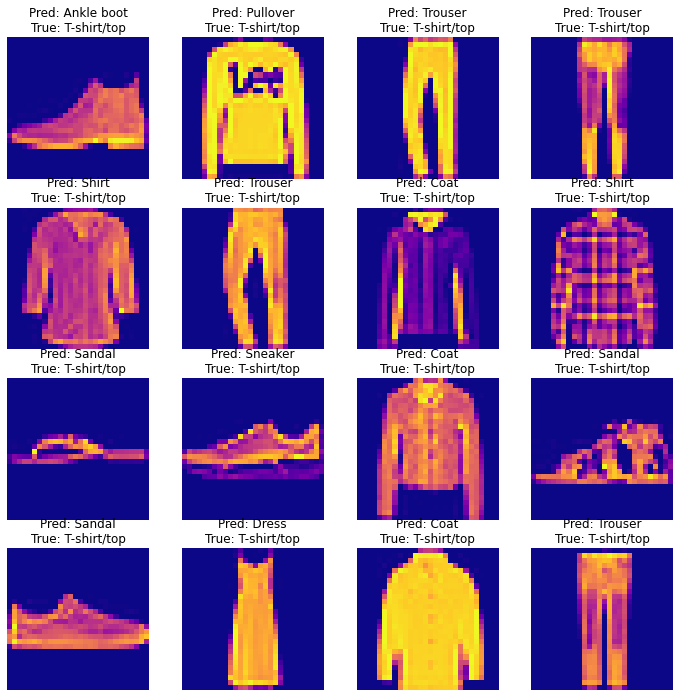

In [71]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def display_sample_predictions(model, data, true_labels):
    plt.figure(figsize=(12, 12))

    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(data[i], cmap='plasma')
        plt.axis('off')

        pred_label = np.argmax(model.predict(np.expand_dims(data[i], axis=0)))
        true_label = np.argmax(true_labels[i])

        plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")

    plt.show()

# Example usage for model1
display_sample_predictions(model1, test_images, test_labels)
